In [1]:
from google.colab import drive
from google.colab import files
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib as mpl

# Mount Google Drive to access files
# This step requires authentication; a prompt pop-up will appear when you run this code if you are not the owner.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('clean_data.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 54 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                         --------------  -----  
 0   Year                                                                                                                                                                           1821 non-null   int64  
 1   what country do you live in?                                                                                                                                                   1819 non-null   object 
 2   are you openly identified at work as a person with a mental health issue

In [ ]:
#Drop columns that are length
df.drop(columns=['why or why not?', 'why or why not?.1' ,'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 51 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                         --------------  -----  
 0   Year                                                                                                                                                                           1821 non-null   int64  
 1   what country do you live in?                                                                                                                                                   1819 non-null   object 
 2   are you openly identified at work as a person with a mental health issue

In [ ]:
#FILL in NA values for columns
df['what is your race?'] = df['what is your race?'].fillna("I prefer not to answer")
df['what us state or territory do you live in?'] = df['what us state or territory do you live in?'].fillna(df['what us state or territory do you live in?'].value_counts().idxmax())
df['what us state or territory do you work in?'] = df['what us state or territory do you work in?'].fillna(df['what us state or territory do you work in?'].value_counts().idxmax())
df['would you have felt more comfortable talking to your previous employer about your physical health or your mental health?']= df['would you have felt more comfortable talking to your previous employer about your physical health or your mental health?'].fillna("I Dont Know")
df['how many employees does your company or organization have?']= df['how many employees does your company or organization have?'].fillna("I Don't Know")
df['what is your age?'] = df['what is your age?'].fillna(df['what is your age?'].mean())
df['what is your gender?'] = df['what is your gender?'].fillna(df['what is your gender?'].mode()[0])
df['what country do you live in?']= df['what country do you live in?'].fillna(df['what country do you live in?'].value_counts().idxmax())
df['what country do you work in?'] = df['what country do you work in?'].fillna(df['what country do you work in?'].value_counts().idxmax())

In [ ]:
df.isna().any()

Year                                                                                                                                                                             False
what country do you live in?                                                                                                                                                     False
are you openly identified at work as a person with a mental health issue?                                                                                                        False
what is your race?                                                                                                                                                               False
overall, how much importance did your previous employer place on physical health?                                                                                                False
was your employer primarily a tech company/organization?                             

In [ ]:
count=0
for column in df.columns:
        # Check if the column data type is object, indicating it likely contains strings
        if df[column].dtype == 'object':
          count+=1
          print(column)
          print(count)


what country do you live in?
1
what is your race?
2
what us state or territory do you live in?
3
would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
4
would you feel comfortable discussing a mental health issue with your coworkers?
5
would you be willing to bring up a physical health issue with a potential employer in an interview?
6
have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?
7
has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
8
do you have a family history of mental illness?
9
was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
10
do you know the options for mental health care available under your employer-provided he

In [ ]:
cols = [x for x in df.columns if x not in ['Year','what country do you work in?', 'what country do you live in?',  'what is your age?', 'how many employees does your company or organization have?',
        'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?']]
data_to_encode = df[cols]
data_not_encode = df[['Year','what country do you work in?', 'what country do you live in?', 'what is your age?', 'how many employees does your company or organization have?',
        'what us state or territory do you live in?' , 'what us state or territory do you work in?', 'what is your race?']]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


def encode(data):
    # Identify categorical columns
    cat_columns = list(data.select_dtypes(include=['category', 'object']).columns)

    # Create the ColumnTransformer to apply OneHotEncoding to the categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), cat_columns)
        ],
        remainder='passthrough'  # This leaves the rest of the columns in the dataset unchanged
    )

    # Apply the ColumnTransformer to the entire DataFrame
    data_transformed = preprocessor.fit_transform(data)

    # Get feature names for one-hot encoded columns
    encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)

    # Combine with the rest of the columns that were not encoded
    non_cat_columns = [col for col in data.columns if col not in cat_columns]
    all_feature_names = list(encoded_feature_names) + non_cat_columns

    # Convert the transformed data back to a DataFrame, ensure the index matches the original data
    encoded_data = pd.DataFrame(data_transformed, columns=all_feature_names, index=data.index)

    return encoded_data

matrix = encode(data_to_encode)
encoded_data = pd.DataFrame(matrix) # to dataframe

# Preprocessed data
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)

In [ ]:
prep_data

,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_I Dont Know,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Mental health,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Physical health,would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Same level of comfort for each,would you feel comfortable discussing a mental health issue with your coworkers?_Maybe,would you feel comfortable discussing a mental health issue with your coworkers?_No,would you feel comfortable discussing a mental health issue with your coworkers?_Yes,would you be willing to bring up a physical health issue with a potential employer in an interview?_Maybe,would you be willing to bring up a physical health issue with a potential employer in an interview?_No,would you be willing to bring up a physical health issue with a potential employer in an interview?_Yes,...,did you ever have a previous coworker discuss their or another coworker's mental health with you?,did you ever discuss your mental health with a previous coworker(s)?,Year,what country do you work in?,what country do you live in?,what is your age?,how many employees does your company or organization have?,what us state or territory do you live in?,what us state or territory do you work in?,what is your race?
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,2017,United Kingdom,United Kingdom,27.0,100-500,Illinois,California,I prefer not to answer
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,2017,United Kingdom,United Kingdom,31.0,100-500,Illinois,California,I prefer not to answer
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2017,United States of America,United States of America,36.0,6-25,Missouri,Missouri,White
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,2017,United States of America,United States of America,22.0,More than 1000,Washington,Washington,White
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,2017,United States of America,United States of America,52.0,I Don't Know,Illinois,Illinois,More than one of the above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2023,United States of America,United States of America,36.0,6-25,Indiana,Indiana,White
1817,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,2023,United States of America,United States of America,44.0,I Don't Know,Maryland,Maryland,White
1818,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,2023,United States of America,United States of America,53.0,500-1000,Indiana,Indiana,White
1819,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,2023,United States of America,United States of America,62.0,I Don't Know,Ohio,Ohio,White


In [ ]:
model_data = prep_data.copy()

col_numeric = [cols for cols in model_data.columns if model_data[cols].dtype in ['int64', 'float64']]
model_data = model_data[col_numeric]

# Model data is our new dataset for predicting "'do you currently have a mental health disorder?'"

# Feature variables and target variable
y = df['do you currently have a mental health disorder?']

cols = [col for col in model_data.columns if 'do you currently have a mental health disorder?' not in col]
X = model_data[cols]

# Data Validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.columns

Index(['would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_I Dont Know',
       'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Mental health',
       'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Physical health',
       'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Same level of comfort for each',
       'would you feel comfortable discussing a mental health issue with your coworkers?_Maybe',
       'would you feel comfortable discussing a mental health issue with your coworkers?_No',
       'would you feel comfortable discussing a mental health issue with your coworkers?_Yes',
       'would you be willing to bring up a physical health issue with a potential employer in an interview?_Maybe',
 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

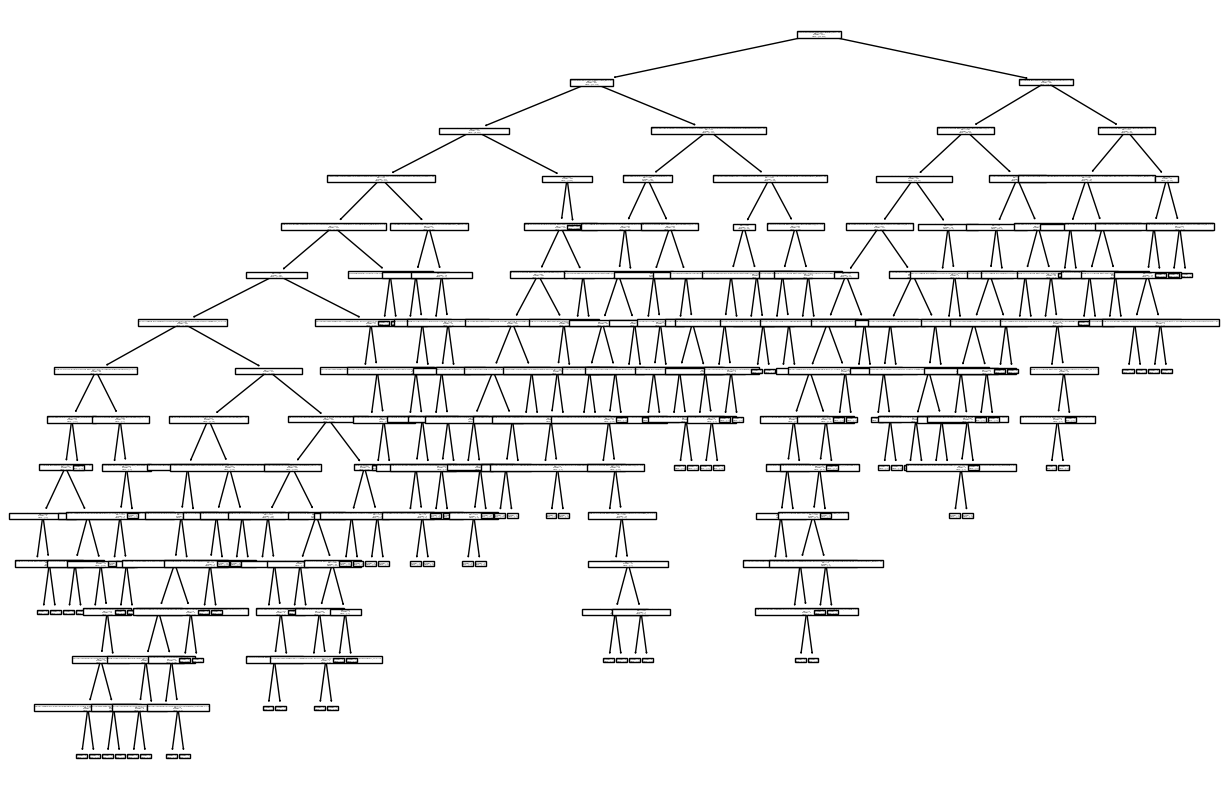

In [ ]:
# Import libraries to show DT as a plot
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Names of features (independent variables)
feature_cols = ['would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_I Dont Know',
       'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Mental health',
       'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Physical health',
       'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?_Same level of comfort for each',
       'would you feel comfortable discussing a mental health issue with your coworkers?_Maybe',
       'would you feel comfortable discussing a mental health issue with your coworkers?_No',
       'would you feel comfortable discussing a mental health issue with your coworkers?_Yes',
       'would you be willing to bring up a physical health issue with a potential employer in an interview?_Maybe',
       'would you be willing to bring up a physical health issue with a potential employer in an interview?_No',
       'would you be willing to bring up a physical health issue with a potential employer in an interview?_Yes',
       'have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?_Maybe',
       'have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?_No',
       'have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?_Yes',
       "has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_I Don't Know",
       'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No',
       'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_Yes',
       "do you have a family history of mental illness?_I Don't Know",
       'do you have a family history of mental illness?_No',
       'do you have a family history of mental illness?_Yes',
       "was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_I Don't Know",
       'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_No',
       'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?_Yes',
       "do you know the options for mental health care available under your employer-provided health coverage?_I Don't Know",
       'do you know the options for mental health care available under your employer-provided health coverage?_No',
       'do you know the options for mental health care available under your employer-provided health coverage?_Yes',
       "would you have been willing to discuss your mental health with your coworkers at previous employers?_I Don't Know",
       'would you have been willing to discuss your mental health with your coworkers at previous employers?_No',
       'would you have been willing to discuss your mental health with your coworkers at previous employers?_Some',
       'would you have been willing to discuss your mental health with your coworkers at previous employers?_Yes',
       'would you feel more comfortable talking to your coworkers about your physical health or your mental health?_Mental health',
       'would you feel more comfortable talking to your coworkers about your physical health or your mental health?_None',
       'would you feel more comfortable talking to your coworkers about your physical health or your mental health?_Physical health',
       'would you feel more comfortable talking to your coworkers about your physical health or your mental health?_Same level of comfort for each',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Difficult',
       "if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_I Don't Know",
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Neither easy nor difficult',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Somewhat difficult',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Somewhat easy',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Very easy',
       'do you currently have a mental health disorder?_No',
       'do you currently have a mental health disorder?_Yes',
       "have you had a mental health disorder in the past?_I Don't Know",
       'have you had a mental health disorder in the past?_No',
       'have you had a mental health disorder in the past?_Yes',
       "did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_I Don't Know",
       'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_No',
       'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_Some',
       'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?_Yes',
       "did your previous employers provide resources to learn more about mental health disorders and how to seek help?_I Don't Know",
       'did your previous employers provide resources to learn more about mental health disorders and how to seek help?_No',
       'did your previous employers provide resources to learn more about mental health disorders and how to seek help?_Some',
       'did your previous employers provide resources to learn more about mental health disorders and how to seek help?_Yes',
       'were you aware of the options for mental health care provided by your previous employers?_Aware',
       'were you aware of the options for mental health care provided by your previous employers?_Not Aware',
       "have your previous employers provided mental health benefits?_I Don't Know",
       'have your previous employers provided mental health benefits?_No',
       'have your previous employers provided mental health benefits?_Some',
       'have your previous employers provided mental health benefits?_Yes',
       'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_Maybe',
       'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_No',
       'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_Yes',
       'would you feel comfortable discussing a mental health issue with your direct supervisor(s)?_Maybe',
       'would you feel comfortable discussing a mental health issue with your direct supervisor(s)?_No',
       'would you feel comfortable discussing a mental health issue with your direct supervisor(s)?_Yes',
       "would you have been willing to discuss your mental health with your direct supervisor(s)?_I Don't Know",
       'would you have been willing to discuss your mental health with your direct supervisor(s)?_No',
       'would you have been willing to discuss your mental health with your direct supervisor(s)?_Some',
       'would you have been willing to discuss your mental health with your direct supervisor(s)?_Yes',
       "is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_I Don't Know",
       'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_No',
       'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?_Yes',
       "does your employer offer resources to learn more about mental health disorders and options for seeking help?_I Don't Know",
       'does your employer offer resources to learn more about mental health disorders and options for seeking help?_No',
       'does your employer offer resources to learn more about mental health disorders and options for seeking help?_Yes',
       'would you bring up your mental health with a potential employer in an interview?_Maybe',
       'would you bring up your mental health with a potential employer in an interview?_No',
       'would you bring up your mental health with a potential employer in an interview?_Yes',
       'are you openly identified at work as a person with a mental health issue?',
       'overall, how much importance did your previous employer place on physical health?',
       'was your employer primarily a tech company/organization?',
       'how willing would you be to share with friends and family that you have a mental illness?',
       'overall, how much importance does your employer place on mental health?',
       'have you ever discussed your mental health with your employer?',
       'overall, how much importance did your previous employer place on mental health?',
       'have you ever sought treatment for a mental health disorder from a mental health professional?',
       'is your employer primarily a tech company/organization?',
       'overall, how well do you think the tech industry supports employees with mental health issues?',
       'what is your gender?', 'are you self-employed?',
       'overall, how much importance does your employer place on physical health?',
       'did you ever discuss your mental health with your previous employer?',
       'is your primary role within your company related to tech/it?',
       "have you ever had a coworker discuss their or another coworker's mental health with you?",
       'do you have previous employers?',
       'have you ever discussed your mental health with coworkers?',
       "did you ever have a previous coworker discuss their or another coworker's mental health with you?",
       'did you ever discuss your mental health with a previous coworker(s)?',
       'Year', 'what is your age?']

# Generate a plot showing the DT
plt.figure(figsize=(15,10))
plot_tree(dt.fit(X_train,y_train), feature_names = feature_cols)
plt.show()

Model Evaluation


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7751371115173674


Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.70      0.69      0.69       201
         Yes       0.82      0.83      0.82       346

    accuracy                           0.78       547
   macro avg       0.76      0.76      0.76       547
weighted avg       0.77      0.78      0.77       547



DECISION TREE WITH CLEAN DATA

In [44]:
df_clean = pd.read_excel('cleaned_data(trim_v3).xlsx')
df_clean.head()

,Year,"do you know the options for mental health care available under your employer-provided health coverage? (I Don't Know=0, No=1, Yes=2)","if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)","do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)","would you have been willing to discuss your mental health with your direct supervisor(s)? (I Don't Know=0, No=1, Some=2, Yes=3)","have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2)",have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?","do you currently have a mental health disorder? (No=0, Yes=1)",...,"is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? (I Don't Know=0, No=1, Yes=2)","would you have been willing to discuss your mental health with your coworkers at previous employers? (I Don't Know=0, No=1, Some=2, Yes=3)",is your employer primarily a tech company/organization?,"would you feel comfortable discussing a mental health issue with your coworkers? (Maybe=0, No=1, Yes=2)",was your employer primarily a tech company/organization?,"what is your gender? (1=0, 2=1, 3=2, Missing=3)",did you ever discuss your mental health with your previous employer?,"overall, how much importance did your previous employer place on mental health?",are you self-employed?,"what is your race? (American Indian or Alaska Native=0, Asian=1, Black or African American=2, Caucasian=3, European American=4, Hispanic=5, I prefer not to answer=6, Missing=7, More than one of the above=8, White=9, White Hispanic=10)"
0,2017,2,1,1,3,2,1,1,0,1,...,0,1,1,2,0,1,0,3,0,7
1,2017,2,1,1,1,2,1,2,2,1,...,0,2,1,2,1,0,0,2,0,7
2,2017,1,0,2,1,2,1,1,1,1,...,2,2,1,0,1,0,0,0,0,9
3,2017,2,0,0,0,1,1,2,5,1,...,2,0,1,2,1,0,0,5,0,9
4,2017,0,1,2,1,2,0,1,5,0,...,0,1,1,0,0,1,0,8,1,8


In [45]:
col_numeric = [cols for cols in df_clean.columns if df_clean[cols].dtype in ['int64', 'float64']]
model_data = df_clean[col_numeric]


y = df_clean['do you currently have a mental health disorder? (No=0, Yes=1)']

cols = [col for col in model_data.columns if 'do you currently have a mental health disorder? (No=0, Yes=1)' not in col]
X = model_data[cols]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

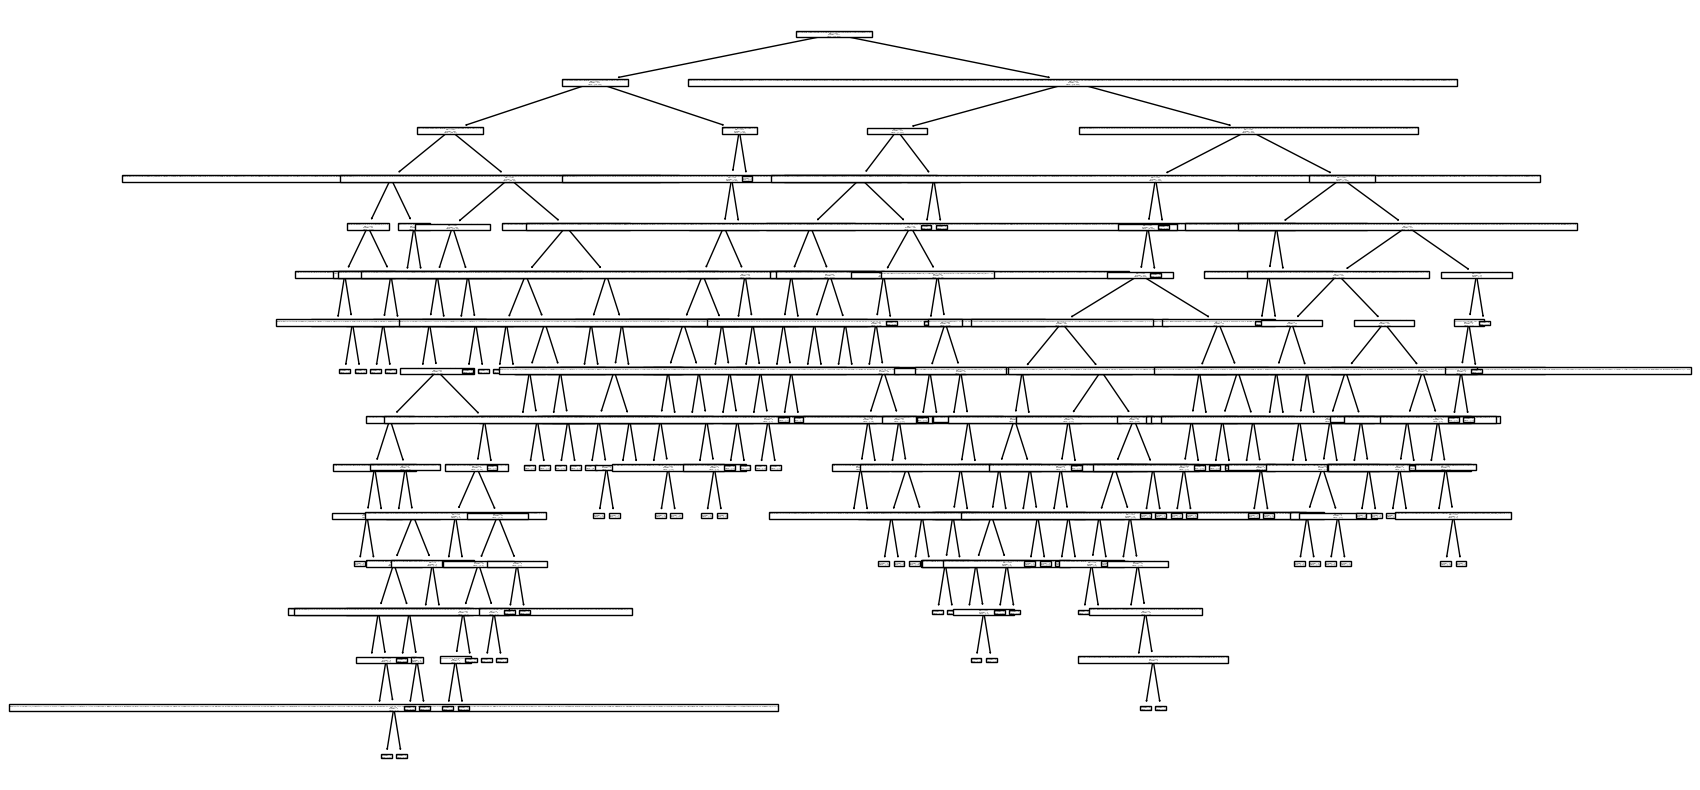

In [29]:
# Import libraries to show DT as a plot
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(dt.fit(X_train,y_train), feature_names = X.columns)
plt.show()

In [48]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7605118829981719


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       201
           1       0.81      0.82      0.81       346

    accuracy                           0.76       547
   macro avg       0.74      0.74      0.74       547
weighted avg       0.76      0.76      0.76       547



In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [51]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


best_model_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Model Score:", best_model_score)

Best Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Model Score: 0.8555843754824763


Decision Tree without Column

In [52]:
df_clean = pd.read_excel('cleaned_data(trim_v3).xlsx')
df_clean.head()

,Year,"do you know the options for mental health care available under your employer-provided health coverage? (I Don't Know=0, No=1, Yes=2)","if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)","do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)","would you have been willing to discuss your mental health with your direct supervisor(s)? (I Don't Know=0, No=1, Some=2, Yes=3)","have you had a mental health disorder in the past? (I Don't Know=0, No=1, Yes=2)",have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?","do you currently have a mental health disorder? (No=0, Yes=1)",...,"is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? (I Don't Know=0, No=1, Yes=2)","would you have been willing to discuss your mental health with your coworkers at previous employers? (I Don't Know=0, No=1, Some=2, Yes=3)",is your employer primarily a tech company/organization?,"would you feel comfortable discussing a mental health issue with your coworkers? (Maybe=0, No=1, Yes=2)",was your employer primarily a tech company/organization?,"what is your gender? (1=0, 2=1, 3=2, Missing=3)",did you ever discuss your mental health with your previous employer?,"overall, how much importance did your previous employer place on mental health?",are you self-employed?,"what is your race? (American Indian or Alaska Native=0, Asian=1, Black or African American=2, Caucasian=3, European American=4, Hispanic=5, I prefer not to answer=6, Missing=7, More than one of the above=8, White=9, White Hispanic=10)"
0,2017,2,1,1,3,2,1,1,0,1,...,0,1,1,2,0,1,0,3,0,7
1,2017,2,1,1,1,2,1,2,2,1,...,0,2,1,2,1,0,0,2,0,7
2,2017,1,0,2,1,2,1,1,1,1,...,2,2,1,0,1,0,0,0,0,9
3,2017,2,0,0,0,1,1,2,5,1,...,2,0,1,2,1,0,0,5,0,9
4,2017,0,1,2,1,2,0,1,5,0,...,0,1,1,0,0,1,0,8,1,8


In [53]:
df_clean['are you openly identified at work as a person with a mental health issue?']
df_clean['have you ever sought treatment for a mental health disorder from a mental health professional?']

0       1
1       0
2       1
3       1
4       1
       ..
1816    1
1817    1
1818    1
1819    1
1820    1
Name: have you ever sought treatment for a mental health disorder from a mental health professional?, Length: 1821, dtype: int64

In [54]:
df_clean = df_clean.drop(columns=['have you had a mental health disorder in the past? (I Don\'t Know=0, No=1, Yes=2)','are you openly identified at work as a person with a mental health issue?','have you ever sought treatment for a mental health disorder from a mental health professional?'])

In [55]:
df_clean

,Year,"do you know the options for mental health care available under your employer-provided health coverage? (I Don't Know=0, No=1, Yes=2)","if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave? (Difficult=0, I Don't Know=1, Neither easy nor difficult=2, Somewhat difficult=3, Somewhat easy=4, Very easy=5)","do you have a family history of mental illness? (I Don't Know=0, No=1, Yes=2)","would you have been willing to discuss your mental health with your direct supervisor(s)? (I Don't Know=0, No=1, Some=2, Yes=3)",have you ever discussed your mental health with coworkers?,"overall, how well do you think the tech industry supports employees with mental health issues?","overall, how much importance does your employer place on mental health?","do you currently have a mental health disorder? (No=0, Yes=1)","would you have felt more comfortable talking to your previous employer about your physical health or your mental health? (Mental health=0, None=1, Physical health=2, Same level of comfort for each=3)",...,"is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer? (I Don't Know=0, No=1, Yes=2)","would you have been willing to discuss your mental health with your coworkers at previous employers? (I Don't Know=0, No=1, Some=2, Yes=3)",is your employer primarily a tech company/organization?,"would you feel comfortable discussing a mental health issue with your coworkers? (Maybe=0, No=1, Yes=2)",was your employer primarily a tech company/organization?,"what is your gender? (1=0, 2=1, 3=2, Missing=3)",did you ever discuss your mental health with your previous employer?,"overall, how much importance did your previous employer place on mental health?",are you self-employed?,"what is your race? (American Indian or Alaska Native=0, Asian=1, Black or African American=2, Caucasian=3, European American=4, Hispanic=5, I prefer not to answer=6, Missing=7, More than one of the above=8, White=9, White Hispanic=10)"
0,2017,2,1,1,3,1,1,0,1,2,...,0,1,1,2,0,1,0,3,0,7
1,2017,2,1,1,1,1,2,2,1,2,...,0,2,1,2,1,0,0,2,0,7
2,2017,1,0,2,1,1,1,1,1,2,...,2,2,1,0,1,0,0,0,0,9
3,2017,2,0,0,0,1,2,5,1,1,...,2,0,1,2,1,0,0,5,0,9
4,2017,0,1,2,1,0,1,5,0,3,...,0,1,1,0,0,1,0,8,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,2023,1,1,1,2,0,2,3,1,2,...,0,2,1,1,0,0,0,5,0,9
1817,2023,0,1,2,2,0,1,5,1,3,...,0,2,1,0,1,0,1,0,1,9
1818,2023,2,2,2,2,1,3,7,1,3,...,0,2,0,0,0,1,1,4,0,9
1819,2023,0,1,1,3,0,5,5,1,3,...,0,2,1,0,0,0,1,8,1,9


In [56]:
col_numeric = [cols for cols in df_clean.columns if df_clean[cols].dtype in ['int64', 'float64']]
model_data = df_clean[col_numeric]


y = df_clean['do you currently have a mental health disorder? (No=0, Yes=1)']

cols = [col for col in model_data.columns if 'do you currently have a mental health disorder? (No=0, Yes=1)' not in col]
X = model_data[cols]

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

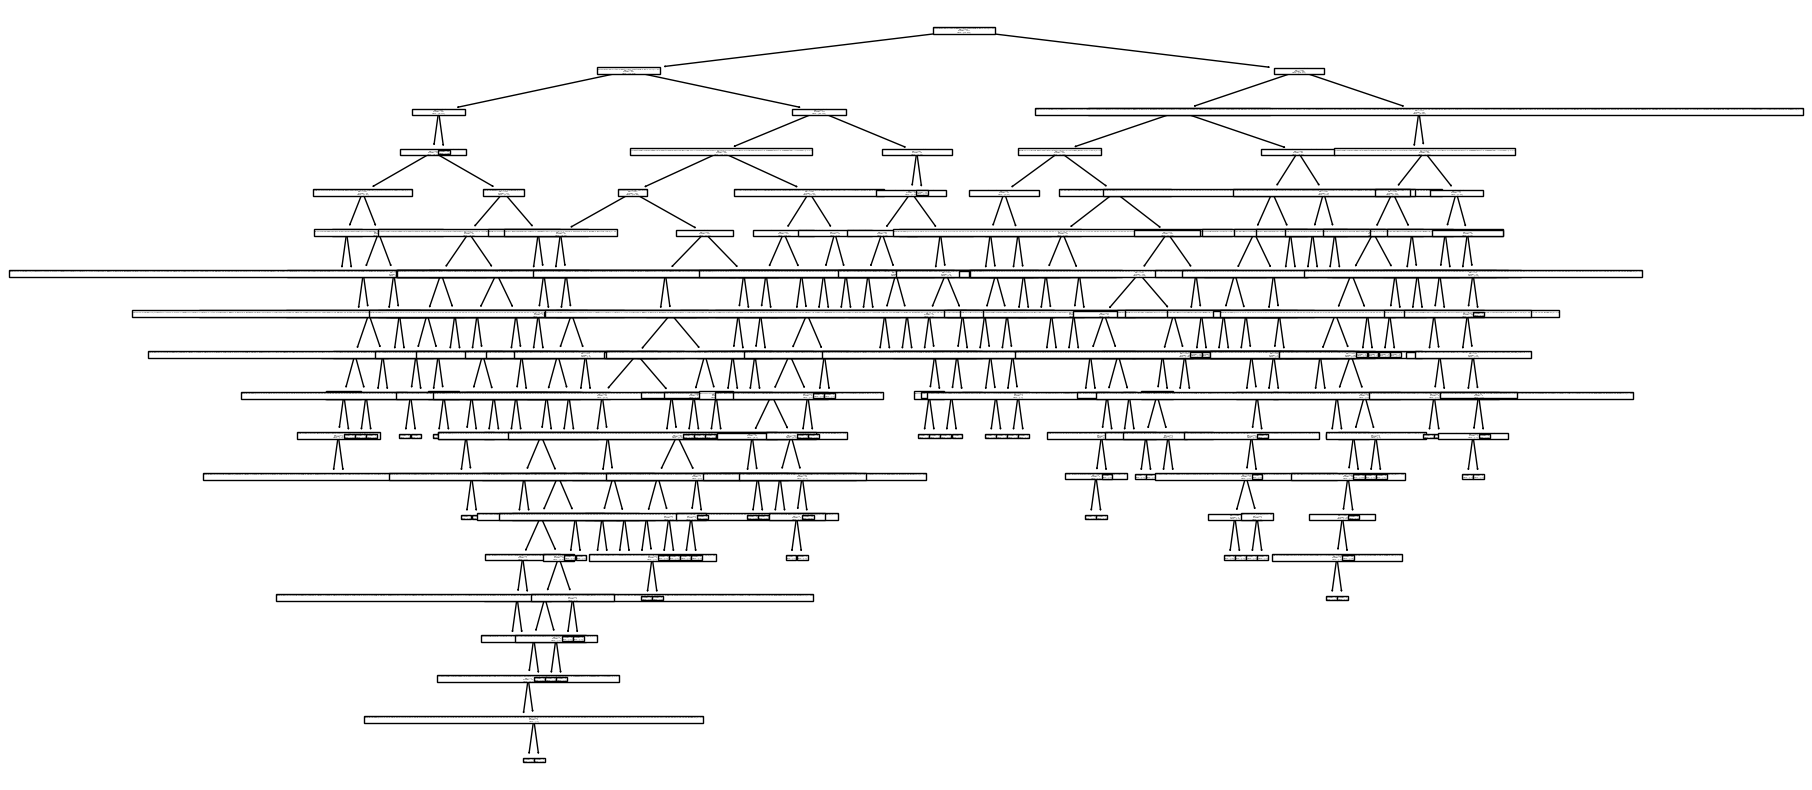

In [42]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(dt.fit(X_train,y_train), feature_names = X.columns)
plt.show()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.49      0.52       201
           1       0.72      0.77      0.75       346

    accuracy                           0.67       547
   macro avg       0.64      0.63      0.64       547
weighted avg       0.66      0.67      0.67       547



HYPERPARAMETER TUNING

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [61]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


best_model_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Model Score:", best_model_score)

Best Parameters: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Model Score: 0.7378570325768103
